# Deep Dive on Metric Learning vs Filter

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

import torch
import numpy as np
import matplotlib.pyplot as plt
import yaml
from pytorch_lightning import Trainer

sys.path.append("../LightningModules")

# Roadmap

## Goal

To understand the gap between metric learning performance and filter performance. To understand if it's simply a parameter limit, or if there is a qualitative difference in edge performance.

1. Given toy sample of hits (pt > 1GeV, -1 < eta < 1, primary, ...?) train embedding 
2. Visualise a subset of tp, fp, tn, fn edges
3. See metric levels (@ 99%, 96% efficiency)
4. Plug edges into filter and train
5. Visualise tp, fp, ... edges

# Make Toy Data

In [7]:
from SuperEmbedding.Models.super_layerless_embedding import SuperLayerlessEmbedding

In [8]:
with open("configs/super_embedding.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [9]:
model = SuperLayerlessEmbedding(hparams)

## Explore

In [ ]:
%%time
model.setup(stage="fit")

In [24]:
sample = model.trainset[0]
r, phi, z = sample.x.T
e = sample.signal_true_edges

In [17]:
sample

Data(cell_data=[2104, 11], eta=[2104], event_file="/project/projectdirs/m3443/data/ITk-upgrade/processed/full_events_v4/event000010004", hid=[2104], modulewise_true_edges=[2, 1813], nhits=[2104], pid=[2104], primary=[2104], pt=[2104], signal_true_edges=[2, 1810], x=[2104, 3])

In [18]:
x, y = r*np.cos(phi*np.pi)*1000, r*np.sin(phi*np.pi)*1000
z = z*1000
eta = sample.eta

(Text(0.5, 1.0, 'Down-beampipe Spacepoint Distribution'),
 Text(0.5, 0, 'x direction (mm)'),
 Text(0, 0.5, 'y direction (mm)'))

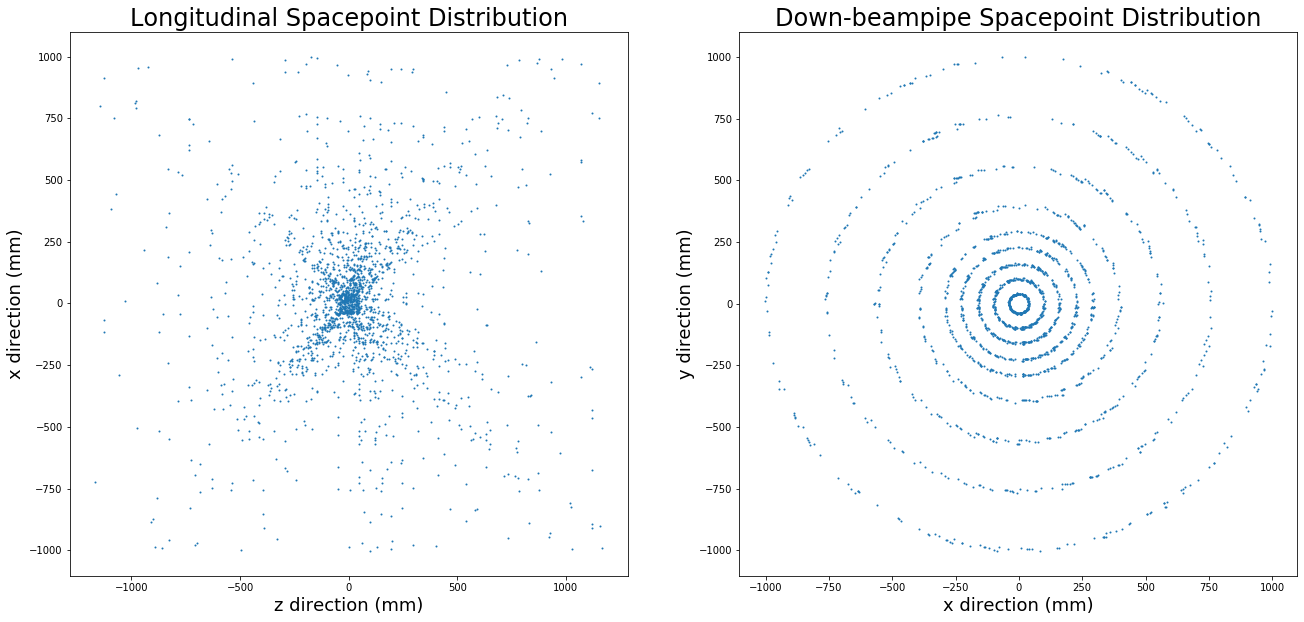

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(22,10))
axs[0].scatter(z, x, s=1)
axs[1].scatter(x, y, s=1)
axs[0].set_title("Longitudinal Spacepoint Distribution", fontsize=24), axs[0].set_xlabel("z direction (mm)", fontsize=18), axs[0].set_ylabel("x direction (mm)", fontsize=18)
axs[1].set_title("Down-beampipe Spacepoint Distribution", fontsize=24), axs[1].set_xlabel("x direction (mm)", fontsize=18), axs[1].set_ylabel("y direction (mm)", fontsize=18)

(Text(0.5, 0, 'r direction (mm)'), Text(0, 0.5, 'phi'))

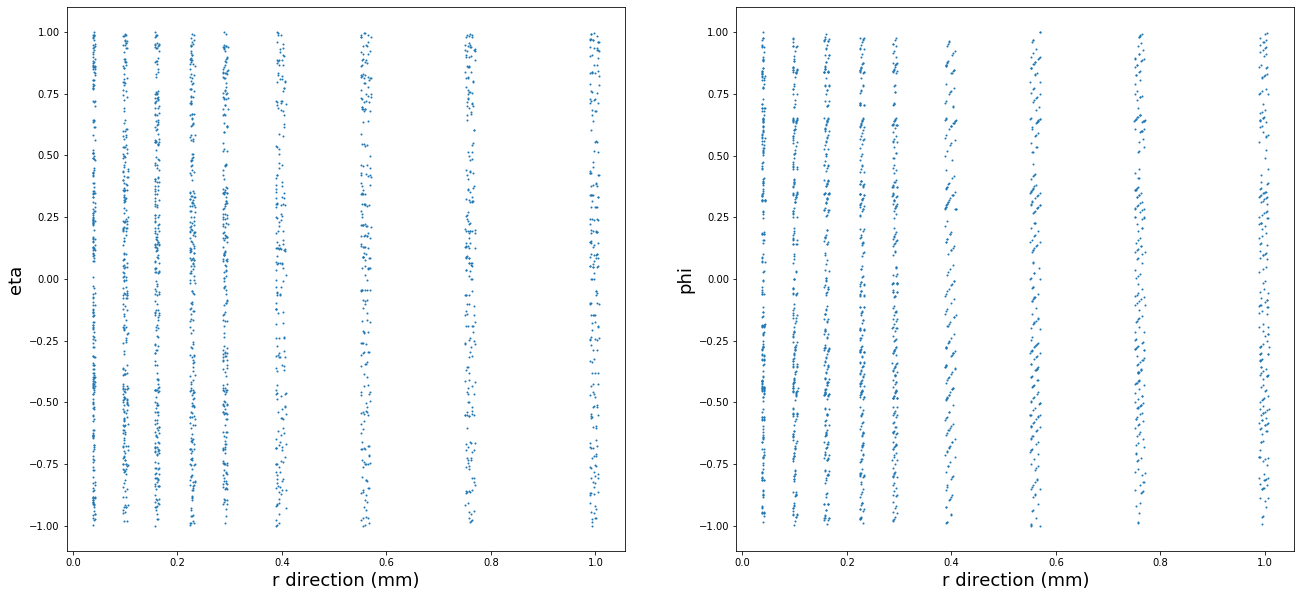

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(22,10))
axs[0].scatter(r, eta, s=1)
axs[0].set_xlabel("r direction (mm)", fontsize=18), axs[0].set_ylabel("eta", fontsize=18)
axs[1].scatter(r, phi, s=1)
axs[1].set_xlabel("r direction (mm)", fontsize=18), axs[1].set_ylabel("phi", fontsize=18)

(Text(0.5, 0, 'r direction (mm)'), Text(0, 0.5, 'phi'))

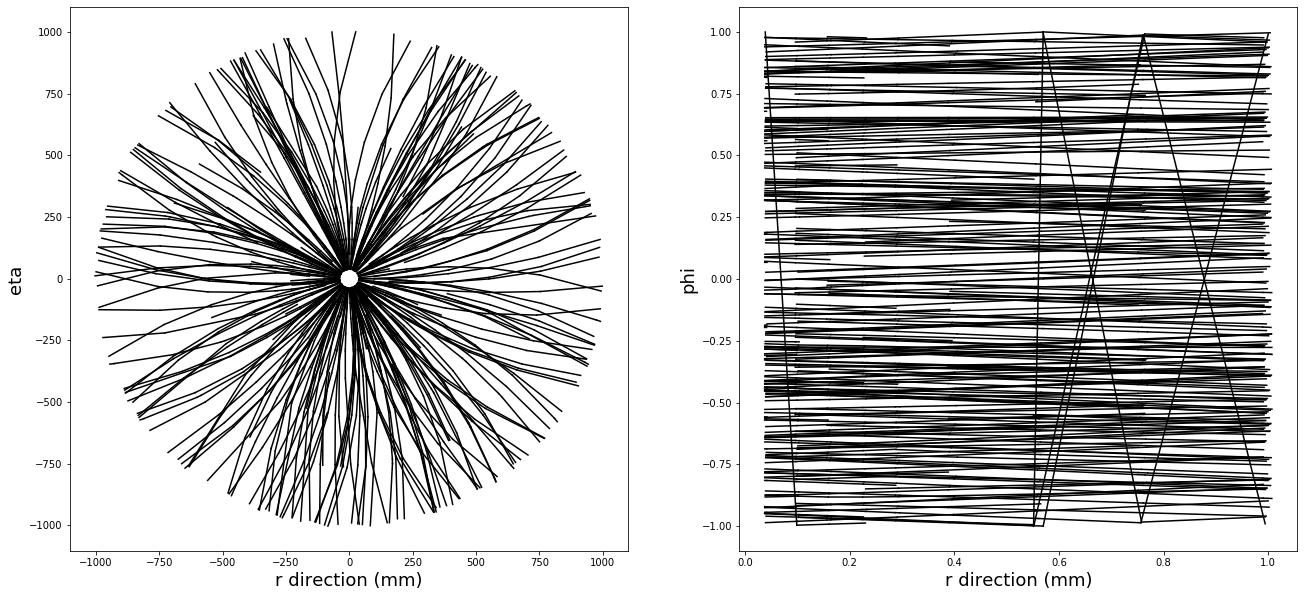

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(22,10))
axs[0].plot(x[e], y[e], c="k")
axs[0].set_xlabel("r direction (mm)", fontsize=18), axs[0].set_ylabel("eta", fontsize=18)
axs[1].plot(r[e], phi[e], c="k")
axs[1].set_xlabel("r direction (mm)", fontsize=18), axs[1].set_ylabel("phi", fontsize=18)

## Train Embedding

In [10]:
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], num_sanity_val_steps=0)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name      | Type       | Params
-----------------------------------------
0 | layers    | ModuleList | 794 K 
1 | emb_layer | Linear     | 4.1 K 
2 | norm      | LayerNorm  | 1.0 K 
3 | act       | Tanh       | 0     
-----------------------------------------
799 K     Trainable params
0         Non-trainable params
799 K     Total params
3.197     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Efficiency: 0.7468398809432983
Purity: 0.054905910044908524
Efficiency: 0.7557335495948792
Purity: 0.05740674212574959
Efficiency: 0.7320716977119446
Purity: 0.05050273612141609
Efficiency: 0.7336569428443909
Purity: 0.05035092309117317
Efficiency: 0.7408333420753479
Purity: 0.061007410287857056
Efficiency: 0.7284936308860779
Purity: 0.04917972534894943
Efficiency: 0.7435566782951355
Purity: 0.06303943693637848
Efficiency: 0.7524657845497131
Purity: 0.0496567077934742
Efficiency: 0.7419986724853516
Purity: 0.04905114695429802
Efficiency: 0.7468030452728271
Purity: 0.06572382152080536


Validating: 0it [00:00, ?it/s]

Efficiency: 0.851123571395874
Purity: 0.08025693148374557
Efficiency: 0.85293048620224
Purity: 0.08349369466304779
Efficiency: 0.8519256114959717
Purity: 0.07683555036783218
Efficiency: 0.8407766819000244
Purity: 0.07661005109548569
Efficiency: 0.8545833230018616
Purity: 0.09491854906082153
Efficiency: 0.8421052694320679
Purity: 0.07523917406797409
Efficiency: 0.850944995880127
Purity: 0.09223821014165878
Efficiency: 0.8584155440330505
Purity: 0.07277140766382217
Efficiency: 0.8478118777275085
Purity: 0.07598864287137985
Efficiency: 0.8584825396537781
Purity: 0.10101313889026642


Validating: 0it [00:00, ?it/s]

Efficiency: 0.915730357170105
Purity: 0.07899679243564606
Efficiency: 0.9180924892425537
Purity: 0.08341877907514572
Efficiency: 0.9226427674293518
Purity: 0.0745840072631836
Efficiency: 0.9139158725738525
Purity: 0.07585892081260681
Efficiency: 0.92166668176651
Purity: 0.09061859548091888
Efficiency: 0.9165154099464417
Purity: 0.07478822022676468
Efficiency: 0.9188144207000732
Purity: 0.09222610294818878
Efficiency: 0.9236398339271545
Purity: 0.07193300127983093
Efficiency: 0.9183540344238281
Purity: 0.07417567819356918
Efficiency: 0.9202898740768433
Purity: 0.10077483206987381


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9410112500190735
Purity: 0.09520088136196136
Efficiency: 0.9402984976768494
Purity: 0.10132987797260284
Efficiency: 0.9352589845657349
Purity: 0.09058751910924911
Efficiency: 0.9346278309822083
Purity: 0.091554656624794
Efficiency: 0.9437500238418579
Purity: 0.10739687085151672
Efficiency: 0.9401088953018188
Purity: 0.08708809316158295
Efficiency: 0.9372852444648743
Purity: 0.11107151955366135
Efficiency: 0.942093551158905
Purity: 0.08668793737888336
Efficiency: 0.9366427063941956
Purity: 0.08792421966791153
Efficiency: 0.948849081993103
Purity: 0.11837907135486603


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9554073214530945
Purity: 0.13138580322265625
Efficiency: 0.9719694256782532
Purity: 0.14159949123859406
Efficiency: 0.95783531665802
Purity: 0.12113196402788162
Efficiency: 0.9498381614685059
Purity: 0.12010475993156433
Efficiency: 0.9566666483879089
Purity: 0.1454453319311142
Efficiency: 0.957531750202179
Purity: 0.1069445013999939
Efficiency: 0.9617697596549988
Purity: 0.1498761624097824
Efficiency: 0.9618199467658997
Purity: 0.12034714967012405
Efficiency: 0.9591770172119141
Purity: 0.1206209734082222
Efficiency: 0.9556692242622375
Purity: 0.15600863099098206


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9585674405097961
Purity: 0.14999176561832428
Efficiency: 0.9716053605079651
Purity: 0.15874621272087097
Efficiency: 0.9641434550285339
Purity: 0.13366472721099854
Efficiency: 0.9585760235786438
Purity: 0.14181070029735565
Efficiency: 0.9633333086967468
Purity: 0.16441473364830017
Efficiency: 0.957531750202179
Purity: 0.12652277946472168
Efficiency: 0.9574742317199707
Purity: 0.17110615968704224
Efficiency: 0.9650015830993652
Purity: 0.14167600870132446
Efficiency: 0.9637491703033447
Purity: 0.1398313045501709
Efficiency: 0.9624893665313721
Purity: 0.1748625487089157


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9764747023582458
Purity: 0.15282738208770752
Efficiency: 0.9799781441688538
Purity: 0.160639688372612
Efficiency: 0.9764276146888733
Purity: 0.13849124312400818
Efficiency: 0.9699029326438904
Purity: 0.144768625497818
Efficiency: 0.9754166603088379
Purity: 0.16701148450374603
Efficiency: 0.9745916724205017
Purity: 0.13021337985992432
Efficiency: 0.9737972617149353
Purity: 0.16728158295154572
Efficiency: 0.9735921025276184
Purity: 0.14183740317821503
Efficiency: 0.9735466837882996
Purity: 0.14430943131446838
Efficiency: 0.9757032990455627
Purity: 0.17568500339984894


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9715589880943298
Purity: 0.14846810698509216
Efficiency: 0.9774299263954163
Purity: 0.15539993345737457
Efficiency: 0.970783531665802
Purity: 0.13329686224460602
Efficiency: 0.9666666388511658
Purity: 0.14507746696472168
Efficiency: 0.9624999761581421
Purity: 0.16701611876487732
Efficiency: 0.9720508456230164
Purity: 0.12980465590953827
Efficiency: 0.9737972617149353
Purity: 0.16603192687034607
Efficiency: 0.9688196182250977
Purity: 0.13732299208641052
Efficiency: 0.9686479568481445
Purity: 0.14001794159412384
Efficiency: 0.9727195501327515
Purity: 0.17331206798553467


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9740168452262878
Purity: 0.1619664877653122
Efficiency: 0.978522002696991
Purity: 0.17064499855041504
Efficiency: 0.9734395742416382
Purity: 0.1435847282409668
Efficiency: 0.9647248983383179
Purity: 0.15845425426959991
Efficiency: 0.96875
Purity: 0.17883239686489105
Efficiency: 0.9655172228813171
Purity: 0.1457853764295578
Efficiency: 0.9716494679450989
Purity: 0.18087318539619446
Efficiency: 0.9697741270065308
Purity: 0.1506226509809494
Efficiency: 0.9676681756973267
Purity: 0.15487951040267944
Efficiency: 0.9714407324790955
Purity: 0.18919143080711365


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9743679761886597
Purity: 0.16333137452602386
Efficiency: 0.9759737849235535
Purity: 0.16904161870479584
Efficiency: 0.9731075763702393
Purity: 0.14393046498298645
Efficiency: 0.9660193920135498
Purity: 0.1572459638118744
Efficiency: 0.9666666388511658
Purity: 0.18022216856479645
Efficiency: 0.9720508456230164
Purity: 0.13916026055812836
Efficiency: 0.9703608155250549
Purity: 0.17932841181755066
Efficiency: 0.9710467457771301
Purity: 0.1489507108926773
Efficiency: 0.9696276783943176
Purity: 0.15308068692684174
Efficiency: 0.9744245409965515
Purity: 0.1899459958076477


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9764747023582458
Purity: 0.16491727530956268
Efficiency: 0.978886067867279
Purity: 0.17461039125919342
Efficiency: 0.9760956168174744
Purity: 0.14662609994411469
Efficiency: 0.968932032585144
Purity: 0.16103699803352356
Efficiency: 0.9708333611488342
Purity: 0.18092872202396393
Efficiency: 0.9720508456230164
Purity: 0.1474994421005249
Efficiency: 0.9733676910400391
Purity: 0.1844976395368576
Efficiency: 0.9726375937461853
Purity: 0.1536412537097931
Efficiency: 0.9712606072425842
Purity: 0.15740446746349335
Efficiency: 0.9701619744300842
Purity: 0.1914374679327011


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9785814881324768
Purity: 0.17367732524871826
Efficiency: 0.982526421546936
Purity: 0.18231558799743652
Efficiency: 0.9790836572647095
Purity: 0.15241098403930664
Efficiency: 0.9724919199943542
Purity: 0.16843226552009583
Efficiency: 0.9795833230018616
Purity: 0.19162115454673767
Efficiency: 0.9749546051025391
Purity: 0.1511281132698059
Efficiency: 0.9737972617149353
Purity: 0.19177734851837158
Efficiency: 0.9755011200904846
Purity: 0.16020482778549194
Efficiency: 0.9745264649391174
Purity: 0.16367726027965546
Efficiency: 0.9739983081817627
Purity: 0.19814428687095642


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9743679761886597
Purity: 0.16758258640766144
Efficiency: 0.9748817086219788
Purity: 0.17529620230197906
Efficiency: 0.9750996232032776
Purity: 0.14758051931858063
Efficiency: 0.96957927942276
Purity: 0.15851852297782898
Efficiency: 0.9791666865348816
Purity: 0.18292208015918732
Efficiency: 0.97096186876297
Purity: 0.14319361746311188
Efficiency: 0.9725086092948914
Purity: 0.181599423289299
Efficiency: 0.9742284417152405
Purity: 0.15381523966789246
Efficiency: 0.9715871810913086
Purity: 0.1564883440732956
Efficiency: 0.9748508334159851
Purity: 0.19130070507526398


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9778792262077332
Purity: 0.17465195059776306
Efficiency: 0.9810702800750732
Purity: 0.18214382231235504
Efficiency: 0.9814077019691467
Purity: 0.15334336459636688
Efficiency: 0.9757281541824341
Purity: 0.16995491087436676
Efficiency: 0.9800000190734863
Purity: 0.19223539531230927
Efficiency: 0.9760435819625854
Purity: 0.15262798964977264
Efficiency: 0.974656343460083
Purity: 0.19158996641635895
Efficiency: 0.9774101376533508
Purity: 0.16101472079753876
Efficiency: 0.9774656891822815
Purity: 0.16474926471710205
Efficiency: 0.9778345823287964
Purity: 0.1991492360830307


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9792836904525757
Purity: 0.16957500576972961
Efficiency: 0.982162356376648
Purity: 0.17704573273658752
Efficiency: 0.9790836572647095
Purity: 0.14861664175987244
Efficiency: 0.9728155136108398
Purity: 0.16743719577789307
Efficiency: 0.9779166579246521
Purity: 0.18791033327579498
Efficiency: 0.9735026955604553
Purity: 0.15225659310817719
Efficiency: 0.9755154848098755
Purity: 0.188370943069458
Efficiency: 0.9761374592781067
Purity: 0.15766483545303345
Efficiency: 0.9748530387878418
Purity: 0.1619817614555359
Efficiency: 0.9748508334159851
Purity: 0.1934201568365097


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9778792262077332
Purity: 0.18520981073379517
Efficiency: 0.9894430041313171
Purity: 0.19105862081050873
Efficiency: 0.983731746673584
Purity: 0.16270385682582855
Efficiency: 0.9766990542411804
Purity: 0.17760254442691803
Efficiency: 0.9795833230018616
Purity: 0.20534545183181763
Efficiency: 0.9774954915046692
Purity: 0.15472565591335297
Efficiency: 0.9785223603248596
Purity: 0.19649788737297058
Efficiency: 0.9821826219558716
Purity: 0.1689932644367218
Efficiency: 0.9774656891822815
Purity: 0.17407235503196716
Efficiency: 0.9761295914649963
Purity: 0.2094576060771942


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9785814881324768
Purity: 0.1852196455001831
Efficiency: 0.9901710748672485
Purity: 0.19032958149909973
Efficiency: 0.9833997488021851
Purity: 0.16228358447551727
Efficiency: 0.9773463010787964
Purity: 0.17744873464107513
Efficiency: 0.9804166555404663
Purity: 0.20535869896411896
Efficiency: 0.9782214164733887
Purity: 0.15519723296165466
Efficiency: 0.9789518713951111
Purity: 0.19557195901870728
Efficiency: 0.9831371307373047
Purity: 0.16854852437973022
Efficiency: 0.978118896484375
Purity: 0.17403684556484222
Efficiency: 0.9765558242797852
Purity: 0.20968332886695862


Validating: 0it [00:00, ?it/s]

Efficiency: 0.978230357170105
Purity: 0.18517780303955078
Efficiency: 0.9901710748672485
Purity: 0.18998393416404724
Efficiency: 0.9833997488021851
Purity: 0.1622036099433899
Efficiency: 0.977022647857666
Purity: 0.1775360256433487
Efficiency: 0.9800000190734863
Purity: 0.204771026968956
Efficiency: 0.9782214164733887
Purity: 0.15542098879814148
Efficiency: 0.9798110127449036
Purity: 0.1956428438425064
Efficiency: 0.9834553003311157
Purity: 0.16846522688865662
Efficiency: 0.978118896484375
Purity: 0.17400650680065155
Efficiency: 0.9761295914649963
Purity: 0.20899881422519684


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9778792262077332
Purity: 0.18442487716674805
Efficiency: 0.9898070693016052
Purity: 0.18918730318546295
Efficiency: 0.9833997488021851
Purity: 0.16207046806812286
Efficiency: 0.9773463010787964
Purity: 0.17740704119205475
Efficiency: 0.9804166555404663
Purity: 0.20476895570755005
Efficiency: 0.9778584241867065
Purity: 0.15496116876602173
Efficiency: 0.9798110127449036
Purity: 0.19517412781715393
Efficiency: 0.9831371307373047
Purity: 0.1677979975938797
Efficiency: 0.9784454703330994
Purity: 0.17386257648468018
Efficiency: 0.9769821166992188
Purity: 0.20845839381217957


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9775280952453613
Purity: 0.18509407341480255
Efficiency: 0.9901710748672485
Purity: 0.19077008962631226
Efficiency: 0.983731746673584
Purity: 0.162999227643013
Efficiency: 0.9766990542411804
Purity: 0.1771334707736969
Efficiency: 0.9808333516120911
Purity: 0.20537428557872772
Efficiency: 0.9778584241867065
Purity: 0.15491661429405212
Efficiency: 0.9798110127449036
Purity: 0.1961306929588318
Efficiency: 0.9821826219558716
Purity: 0.1684032529592514
Efficiency: 0.978118896484375
Purity: 0.17400650680065155
Efficiency: 0.9761295914649963
Purity: 0.2088463306427002


Validating: 0it [00:00, ?it/s]

Efficiency: 0.978230357170105
Purity: 0.18528863787651062
Efficiency: 0.9905351400375366
Purity: 0.19042620062828064
Efficiency: 0.9847277402877808
Purity: 0.1629849374294281
Efficiency: 0.977022647857666
Purity: 0.17814362049102783
Efficiency: 0.9816666841506958
Purity: 0.206232488155365
Efficiency: 0.9778584241867065
Purity: 0.15635518729686737
Efficiency: 0.9793814420700073
Purity: 0.19641625881195068
Efficiency: 0.9831371307373047
Purity: 0.16882477700710297
Efficiency: 0.978118896484375
Purity: 0.17470687627792358
Efficiency: 0.9765558242797852
Purity: 0.20977932214736938


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9789325594902039
Purity: 0.1854216605424881
Efficiency: 0.9901710748672485
Purity: 0.190476194024086
Efficiency: 0.9843957424163818
Purity: 0.16311822831630707
Efficiency: 0.977022647857666
Purity: 0.17855453491210938
Efficiency: 0.981249988079071
Purity: 0.2064521759748459
Efficiency: 0.9782214164733887
Purity: 0.1571062207221985
Efficiency: 0.9793814420700073
Purity: 0.19711247086524963
Efficiency: 0.9834553003311157
Purity: 0.1690179407596588
Efficiency: 0.9777922630310059
Purity: 0.17519016563892365
Efficiency: 0.9765558242797852
Purity: 0.2092619687318802


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9792836904525757
Purity: 0.18487338721752167
Efficiency: 0.9901710748672485
Purity: 0.19058296084403992
Efficiency: 0.9843957424163818
Purity: 0.16286733746528625
Efficiency: 0.9766990542411804
Purity: 0.17759209871292114
Efficiency: 0.9816666841506958
Purity: 0.20554876327514648
Efficiency: 0.9774954915046692
Purity: 0.15587197244167328
Efficiency: 0.9798110127449036
Purity: 0.195743590593338
Efficiency: 0.9831371307373047
Purity: 0.16853013634681702
Efficiency: 0.978118896484375
Purity: 0.17436106503009796
Efficiency: 0.9761295914649963
Purity: 0.20918972790241241


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9796348214149475
Purity: 0.18511146306991577
Efficiency: 0.9894430041313171
Purity: 0.19049622118473053
Efficiency: 0.9850597381591797
Purity: 0.1631474792957306
Efficiency: 0.977669894695282
Purity: 0.17781047523021698
Efficiency: 0.9816666841506958
Purity: 0.20589005947113037
Efficiency: 0.9782214164733887
Purity: 0.15596967935562134
Efficiency: 0.9798110127449036
Purity: 0.19592852890491486
Efficiency: 0.9831371307373047
Purity: 0.16847500205039978
Efficiency: 0.9794251918792725
Purity: 0.1745634526014328
Efficiency: 0.9752770662307739
Purity: 0.20919813215732574


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9796348214149475
Purity: 0.18539437651634216
Efficiency: 0.9890789985656738
Purity: 0.19070681929588318
Efficiency: 0.9847277402877808
Purity: 0.16328103840351105
Efficiency: 0.977669894695282
Purity: 0.17782093584537506
Efficiency: 0.9816666841506958
Purity: 0.20605212450027466
Efficiency: 0.9789473414421082
Purity: 0.15642036497592926
Efficiency: 0.9798110127449036
Purity: 0.19655321538448334
Efficiency: 0.9834553003311157
Purity: 0.1686122566461563
Efficiency: 0.9794251918792725
Purity: 0.17462442815303802
Efficiency: 0.9752770662307739
Purity: 0.20954300463199615


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9799859523773193
Purity: 0.1855964958667755
Efficiency: 0.9887149333953857
Purity: 0.19051627814769745
Efficiency: 0.9847277402877808
Purity: 0.1632450819015503
Efficiency: 0.978317141532898
Purity: 0.17802248895168304
Efficiency: 0.9820833206176758
Purity: 0.20604948699474335
Efficiency: 0.9793103337287903
Purity: 0.1566600799560547
Efficiency: 0.9798110127449036
Purity: 0.19663792848587036
Efficiency: 0.9837734699249268
Purity: 0.1686944216489792
Efficiency: 0.9794251918792725
Purity: 0.17468546330928802
Efficiency: 0.9757032990455627
Purity: 0.2093278467655182


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9796348214149475
Purity: 0.1858637034893036
Efficiency: 0.9887149333953857
Purity: 0.19086436927318573
Efficiency: 0.9847277402877808
Purity: 0.16365040838718414
Efficiency: 0.9786407947540283
Purity: 0.1786072850227356
Efficiency: 0.981249988079071
Purity: 0.20652459561824799
Efficiency: 0.9793103337287903
Purity: 0.15735448896884918
Efficiency: 0.980240523815155
Purity: 0.19696184992790222
Efficiency: 0.9837734699249268
Purity: 0.16908186674118042
Efficiency: 0.9790986180305481
Purity: 0.17519868910312653
Efficiency: 0.9761295914649963
Purity: 0.2096109837293625


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9803370833396912
Purity: 0.18613334000110626
Efficiency: 0.9890789985656738
Purity: 0.19092123210430145
Efficiency: 0.9850597381591797
Purity: 0.16371461749076843
Efficiency: 0.9789643883705139
Purity: 0.17864525318145752
Efficiency: 0.9820833206176758
Purity: 0.2062658667564392
Efficiency: 0.9796733260154724
Purity: 0.15748628973960876
Efficiency: 0.9806700944900513
Purity: 0.1972183883190155
Efficiency: 0.9837734699249268
Purity: 0.1692206710577011
Efficiency: 0.9797518253326416
Purity: 0.17527459561824799
Efficiency: 0.9765558242797852
Purity: 0.2094724327325821


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9803370833396912
Purity: 0.1861705631017685
Efficiency: 0.9890789985656738
Purity: 0.1912841498851776
Efficiency: 0.9847277402877808
Purity: 0.16403959691524506
Efficiency: 0.9792880415916443
Purity: 0.17949934303760529
Efficiency: 0.9816666841506958
Purity: 0.20701168477535248
Efficiency: 0.9793103337287903
Purity: 0.15823118388652802
Efficiency: 0.980240523815155
Purity: 0.1975073516368866
Efficiency: 0.9837734699249268
Purity: 0.1696012318134308
Efficiency: 0.9804049730300903
Purity: 0.17632892727851868
Efficiency: 0.9769821166992188
Purity: 0.2099093347787857


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9796348214149475
Purity: 0.18626075983047485
Efficiency: 0.9887149333953857
Purity: 0.19124066829681396
Efficiency: 0.9847277402877808
Purity: 0.16399425268173218
Efficiency: 0.9792880415916443
Purity: 0.17876765131950378
Efficiency: 0.9825000166893005
Purity: 0.20651602745056152
Efficiency: 0.9796733260154724
Purity: 0.1575598418712616
Efficiency: 0.980240523815155
Purity: 0.19713199138641357
Efficiency: 0.9840916395187378
Purity: 0.16951660811901093
Efficiency: 0.9797518253326416
Purity: 0.17559263110160828
Efficiency: 0.9765558242797852
Purity: 0.21014492213726044


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9813904762268066
Purity: 0.19018781185150146
Efficiency: 0.991263210773468
Purity: 0.19747625291347504
Efficiency: 0.9847277402877808
Purity: 0.16730596125125885
Efficiency: 0.9796116352081299
Purity: 0.18407930433750153
Efficiency: 0.9816666841506958
Purity: 0.21118681132793427
Efficiency: 0.9782214164733887
Purity: 0.1619202047586441
Efficiency: 0.9810996651649475
Purity: 0.203420028090477
Efficiency: 0.9834553003311157
Purity: 0.1737297624349594
Efficiency: 0.9804049730300903
Purity: 0.1800083965063095
Efficiency: 0.97826087474823
Purity: 0.21450603008270264


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.1903076469898224
Efficiency: 0.991263210773468
Purity: 0.19770565629005432
Efficiency: 0.9847277402877808
Purity: 0.16749492287635803
Efficiency: 0.9796116352081299
Purity: 0.18431468307971954
Efficiency: 0.9820833206176758
Purity: 0.21114395558834076
Efficiency: 0.9782214164733887
Purity: 0.1620272994041443
Efficiency: 0.9810996651649475
Purity: 0.20372848212718964
Efficiency: 0.9834553003311157
Purity: 0.17357367277145386
Efficiency: 0.980078399181366
Purity: 0.18007801473140717
Efficiency: 0.97826087474823
Purity: 0.2147267907857895


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9813904762268066
Purity: 0.190317302942276
Efficiency: 0.991263210773468
Purity: 0.19769130647182465
Efficiency: 0.9850597381591797
Purity: 0.16759870946407318
Efficiency: 0.9796116352081299
Purity: 0.18449442088603973
Efficiency: 0.9816666841506958
Purity: 0.21116787195205688
Efficiency: 0.9782214164733887
Purity: 0.16216379404067993
Efficiency: 0.9810996651649475
Purity: 0.20391036570072174
Efficiency: 0.9834553003311157
Purity: 0.17357367277145386
Efficiency: 0.980078399181366
Purity: 0.18022941052913666
Efficiency: 0.97826087474823
Purity: 0.214827299118042


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.1903076469898224
Efficiency: 0.991263210773468
Purity: 0.19761957228183746
Efficiency: 0.9850597381591797
Purity: 0.16750408709049225
Efficiency: 0.9796116352081299
Purity: 0.18437081575393677
Efficiency: 0.9820833206176758
Purity: 0.21135222911834717
Efficiency: 0.9782214164733887
Purity: 0.16207601130008698
Efficiency: 0.9806700944900513
Purity: 0.20369379222393036
Efficiency: 0.9831371307373047
Purity: 0.1735759973526001
Efficiency: 0.980078399181366
Purity: 0.18033772706985474
Efficiency: 0.97826087474823
Purity: 0.2147669792175293


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.1903076469898224
Efficiency: 0.991263210773468
Purity: 0.19769130647182465
Efficiency: 0.9857237935066223
Purity: 0.1676453948020935
Efficiency: 0.9802588820457458
Purity: 0.18450386822223663
Efficiency: 0.9820833206176758
Purity: 0.21118178963661194
Efficiency: 0.9785844087600708
Purity: 0.16216541826725006
Efficiency: 0.9806700944900513
Purity: 0.20367561280727386
Efficiency: 0.9834553003311157
Purity: 0.1736712008714676
Efficiency: 0.9807315468788147
Purity: 0.18039286136627197
Efficiency: 0.97826087474823
Purity: 0.21490776538848877


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.19041132926940918
Efficiency: 0.991263210773468
Purity: 0.19767695665359497
Efficiency: 0.9860557913780212
Purity: 0.16766399145126343
Efficiency: 0.9805825352668762
Purity: 0.18455353379249573
Efficiency: 0.9820833206176758
Purity: 0.21120071411132812
Efficiency: 0.9785844087600708
Purity: 0.1621849238872528
Efficiency: 0.9810996651649475
Purity: 0.2035650610923767
Efficiency: 0.9834553003311157
Purity: 0.17369072139263153
Efficiency: 0.9807315468788147
Purity: 0.1804036945104599
Efficiency: 0.9786871075630188
Purity: 0.21496114134788513


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.19048917293548584
Efficiency: 0.991263210773468
Purity: 0.19763390719890594
Efficiency: 0.9857237935066223
Purity: 0.16758862137794495
Efficiency: 0.9805825352668762
Purity: 0.18435142934322357
Efficiency: 0.9820833206176758
Purity: 0.21135222911834717
Efficiency: 0.9785844087600708
Purity: 0.16216541826725006
Efficiency: 0.9806700944900513
Purity: 0.20360295474529266
Efficiency: 0.9837734699249268
Purity: 0.1737566739320755
Efficiency: 0.9807315468788147
Purity: 0.18033869564533234
Efficiency: 0.97826087474823
Purity: 0.2148675173521042


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.19056706130504608
Efficiency: 0.991263210773468
Purity: 0.1976626068353653
Efficiency: 0.9860557913780212
Purity: 0.16766399145126343
Efficiency: 0.9805825352668762
Purity: 0.1844748854637146
Efficiency: 0.9820833206176758
Purity: 0.2115229219198227
Efficiency: 0.9785844087600708
Purity: 0.16230209171772003
Efficiency: 0.980240523815155
Purity: 0.2035863995552063
Efficiency: 0.9834553003311157
Purity: 0.173895925283432
Efficiency: 0.9807315468788147
Purity: 0.18038202822208405
Efficiency: 0.97826087474823
Purity: 0.2150084376335144


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.19050215184688568
Efficiency: 0.991263210773468
Purity: 0.19777745008468628
Efficiency: 0.9853917956352234
Purity: 0.1676173210144043
Efficiency: 0.9805825352668762
Purity: 0.18448612093925476
Efficiency: 0.9820833206176758
Purity: 0.21150395274162292
Efficiency: 0.9785844087600708
Purity: 0.1622825562953949
Efficiency: 0.980240523815155
Purity: 0.2035500854253769
Efficiency: 0.9834553003311157
Purity: 0.17400360107421875
Efficiency: 0.9807315468788147
Purity: 0.18039286136627197
Efficiency: 0.97826087474823
Purity: 0.2150285840034485


Validating: 0it [00:00, ?it/s]

Efficiency: 0.9817415475845337
Purity: 0.1906060427427292
Efficiency: 0.991263210773468
Purity: 0.19777745008468628
Efficiency: 0.9857237935066223
Purity: 0.1676453948020935
Efficiency: 0.9805825352668762
Purity: 0.18449735641479492
Efficiency: 0.9820833206176758
Purity: 0.21150395274162292
Efficiency: 0.9785844087600708
Purity: 0.16232162714004517
Efficiency: 0.980240523815155
Purity: 0.20349563658237457
Efficiency: 0.9834553003311157
Purity: 0.17404279112815857
Efficiency: 0.9807315468788147
Purity: 0.18052299320697784
Efficiency: 0.9778345823287964
Purity: 0.21493488550186157


## Visualise

In [11]:
sample = model.valset[0].cpu()
r, phi, z = sample.x.T
e = sample.signal_true_edges

In [12]:
sample

Data(cell_data=[3350, 11], eta=[3350], event_file="/project/projectdirs/m3443/data/ITk-upgrade/processed/full_events_v4/event000010005", hid=[3350], modulewise_true_edges=[2, 2852], nhits=[3350], pid=[3350], primary=[3350], pt=[3350], signal_true_edges=[2, 2848], x=[3350, 3])

In [13]:
model = model.to("cuda")

In [20]:
model.eval()
with torch.no_grad():
    output = model.shared_evaluation(sample.to("cuda"), 0, 1.1, 500)

for k, v in output.items():
    output[k] = v.cpu()

Efficiency: 0.988061785697937
Purity: 0.15008799731731415


In [19]:
model.eval()
with torch.no_grad():
    output = model.shared_evaluation(sample.to("cuda"), 0, 0.9, 500)

for k, v in output.items():
    output[k] = v.cpu()

Efficiency: 0.9683988690376282
Purity: 0.24305984377861023


In [21]:
t = output["truth_graph"]
tp = output["preds"][:, output["truth"].bool()]
fp = output["preds"][:, ~output["truth"].bool()]

In [22]:
output

{'loss': tensor(0.2888),
 'distances': tensor([0.6001, 0.9855, 0.0533,  ..., 0.3971, 0.1395, 0.1115]),
 'preds': tensor([[   0,    0,    0,  ..., 3349, 3349, 3349],
         [   6,    2,    4,  ..., 2668, 3018, 3022]]),
 'truth': tensor([0., 0., 0.,  ..., 0., 0., 1.]),
 'truth_graph': tensor([[ 489,  904, 1308,  ...,  910, 1325,  281],
         [ 904, 1308, 1706,  ...,  924,  910,  315]])}

In [23]:
x, y = r*np.cos(phi*np.pi)*1000, r*np.sin(phi*np.pi)*1000
z = z*1000
eta = sample.eta

In [24]:
phi_seg = 0.1
es = e[:, (phi[e] > -phi_seg).all(0) & (phi[e] < phi_seg).all(0)]
tps = tp[:, (phi[tp] > -phi_seg).all(0) & (phi[tp] < phi_seg).all(0)]
fps = fp[:, (phi[fp] > -phi_seg).all(0) & (phi[fp] < phi_seg).all(0)]

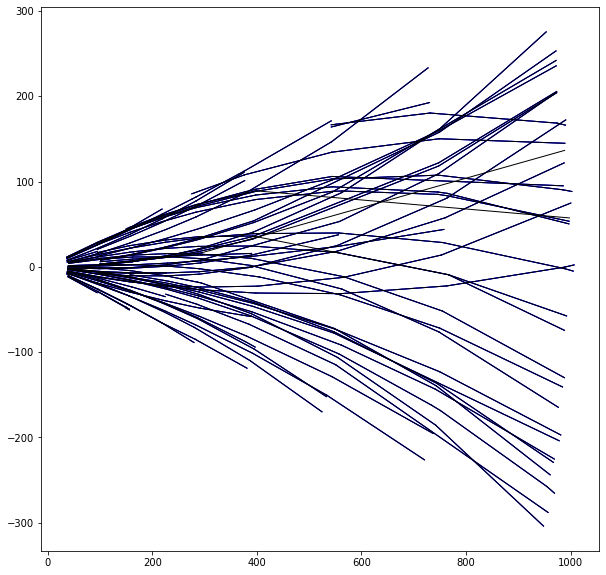

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
axs.plot(x[tps], y[tps], c="b", linewidth=1);
axs.plot(x[es], y[es], c="k", linewidth=1);

Embedding performance viz

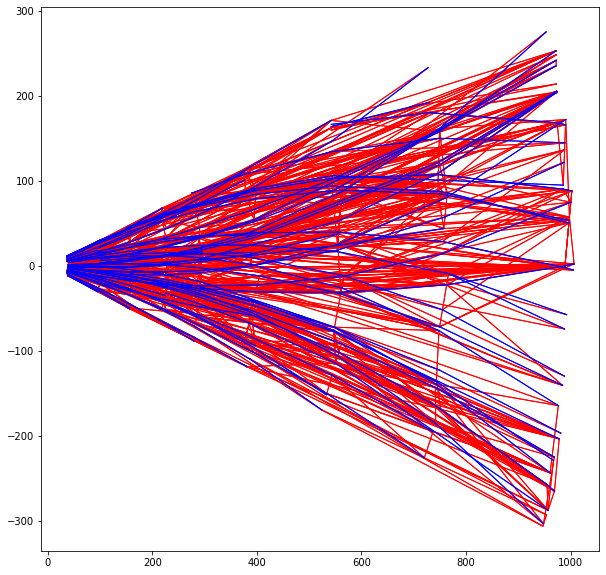

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
axs.plot(x[fps], y[fps], c="r", linewidth=1);
axs.plot(x[tps], y[tps], c="b", linewidth=1);

Filter performance viz

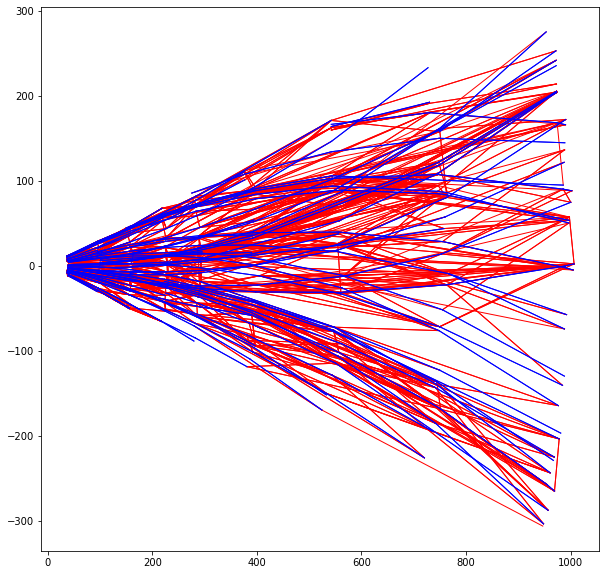

In [66]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
axs.plot(x[fps], y[fps], c="r", linewidth=1);
axs.plot(x[tps], y[tps], c="b", linewidth=1);

## Build Dataset

In [27]:
model = model.to("cuda")
model.eval()
r = 1.1
with torch.no_grad():
    for sample in model.trainset:
        output = model.shared_evaluation(sample.to("cuda"), 0, r, 500)
        sample = sample.cpu()
        for k, v in output.items():
            output[k] = v.cpu()
        sample.edge_index = output["preds"]
        sample.y = output["truth"]
    for sample in model.valset:
        output = model.shared_evaluation(sample.to("cuda"), 0, r, 500)
        sample = sample.cpu()
        for k, v in output.items():
            output[k] = v.cpu()
        sample.edge_index = output["preds"]
        sample.y = output["truth"]
    for sample in model.testset:
        output = model.shared_evaluation(sample.to("cuda"), 0, r, 500)
        sample = sample.cpu()
        for k, v in output.items():
            output[k] = v.cpu()
        sample.edge_index = output["preds"]
        sample.y = output["truth"]

for k, v in output.items():
    output[k] = v.cpu()

Efficiency: 0.9910820722579956
Purity: 0.13361118733882904
Efficiency: 0.9868420958518982
Purity: 0.13197587430477142
Efficiency: 0.990867555141449
Purity: 0.167086660861969
Efficiency: 0.9913638234138489
Purity: 0.14516043663024902
Efficiency: 0.9861878156661987
Purity: 0.1750514805316925
Efficiency: 0.9911128282546997
Purity: 0.15475113689899445
Efficiency: 0.9897649884223938
Purity: 0.15113452076911926
Efficiency: 0.9905982613563538
Purity: 0.17174187302589417
Efficiency: 0.9924654960632324
Purity: 0.166059672832489
Efficiency: 0.9930257797241211
Purity: 0.1255766600370407
Efficiency: 0.9873617887496948
Purity: 0.14141550660133362
Efficiency: 0.9907585382461548
Purity: 0.1584945172071457
Efficiency: 0.9896793365478516
Purity: 0.13964010775089264
Efficiency: 0.9904458522796631
Purity: 0.13277359306812286
Efficiency: 0.9960784316062927
Purity: 0.18752306699752808
Efficiency: 0.9927194714546204
Purity: 0.1643155813217163
Efficiency: 0.9863945841789246
Purity: 0.1500871628522873
Efficie

## Train Filter

In [28]:
from Filter.Models.vanilla_filter import VanillaFilter

In [29]:
with open("example_filter.yaml") as f:
        hparams = yaml.load(f, Loader=yaml.FullLoader)

In [30]:
filtermodel = VanillaFilter(hparams)

In [31]:
%%time
filtermodel.setup(stage="fit")

Loading data
Running set builder
CPU times: user 18.2 ms, sys: 124 ms, total: 142 ms
Wall time: 393 ms


In [32]:
filtermodel.trainset = model.trainset
filtermodel.valset = model.valset
filtermodel.testset = model.testset

In [33]:
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], num_sanity_val_steps=0)
trainer.fit(filtermodel)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name         | Type        | Params
---------------------------------------------
0 | input_layer  | Linear      | 11.8 K
1 | layers       | ModuleList  | 525 K 
2 | output_layer | Linear      | 513   
3 | layernorm    | LayerNorm   | 1.0 K 
4 | batchnorm    | BatchNorm1d | 1.0 K 
5 | act          | Tanh        | 0     
---------------------------------------------
539 K     Trainable params
0         Non-trainable params
539 K     Total params
2.159     Total estimated model params size (MB)


Loading data


Training: 0it [00:00, ?it/s]

/global/homes/d/danieltm/.conda/envs/exatrkx-test/lib/python3.7/site-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Validating: 0it [00:00, ?it/s]

../LightningModules/Filter/filter_base.py:440: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eff = torch.tensor(edge_true_positive / edge_true)
../LightningModules/Filter/filter_base.py:441: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pur = torch.tensor(edge_true_positive / edge_positive)


Eff: tensor(1., device='cuda:0') Pur: tensor(0.1501, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1564, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1330, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1449, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1679, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1280, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1616, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1364, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1414, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1733, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(1., device='cuda:0') Pur: tensor(0.1501, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1564, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1330, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1449, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1679, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1280, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1616, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1364, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1414, device='cuda:0')
Eff: tensor(1., device='cuda:0') Pur: tensor(0.1733, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.1660, device='cuda:0')
Eff: tensor(0.9947, device='cuda:0') Pur: tensor(0.1756, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.1474, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.1628, device='cuda:0')
Eff: tensor(0.9958, device='cuda:0') Pur: tensor(0.1879, device='cuda:0')
Eff: tensor(0.9912, device='cuda:0') Pur: tensor(0.1447, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.1821, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.1542, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.1583, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.1944, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9977, device='cuda:0') Pur: tensor(0.1606, device='cuda:0')
Eff: tensor(0.9991, device='cuda:0') Pur: tensor(0.1693, device='cuda:0')
Eff: tensor(0.9972, device='cuda:0') Pur: tensor(0.1430, device='cuda:0')
Eff: tensor(0.9980, device='cuda:0') Pur: tensor(0.1555, device='cuda:0')
Eff: tensor(0.9989, device='cuda:0') Pur: tensor(0.1801, device='cuda:0')
Eff: tensor(0.9976, device='cuda:0') Pur: tensor(0.1374, device='cuda:0')
Eff: tensor(0.9989, device='cuda:0') Pur: tensor(0.1740, device='cuda:0')
Eff: tensor(0.9987, device='cuda:0') Pur: tensor(0.1475, device='cuda:0')
Eff: tensor(0.9985, device='cuda:0') Pur: tensor(0.1527, device='cuda:0')
Eff: tensor(0.9996, device='cuda:0') Pur: tensor(0.1864, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9950, device='cuda:0') Pur: tensor(0.2017, device='cuda:0')
Eff: tensor(0.9958, device='cuda:0') Pur: tensor(0.2151, device='cuda:0')
Eff: tensor(0.9948, device='cuda:0') Pur: tensor(0.1817, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2012, device='cuda:0')
Eff: tensor(0.9964, device='cuda:0') Pur: tensor(0.2306, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.1814, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2204, device='cuda:0')
Eff: tensor(0.9969, device='cuda:0') Pur: tensor(0.1914, device='cuda:0')
Eff: tensor(0.9965, device='cuda:0') Pur: tensor(0.1961, device='cuda:0')
Eff: tensor(0.9978, device='cuda:0') Pur: tensor(0.2362, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2187, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2320, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.1970, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2155, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2482, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.1957, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2383, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2063, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.2117, device='cuda:0')
Eff: tensor(0.9965, device='cuda:0') Pur: tensor(0.2531, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9929, device='cuda:0') Pur: tensor(0.2257, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2377, device='cuda:0')
Eff: tensor(0.9906, device='cuda:0') Pur: tensor(0.2012, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2224, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2556, device='cuda:0')
Eff: tensor(0.9903, device='cuda:0') Pur: tensor(0.2004, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2453, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2129, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2171, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2595, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9947, device='cuda:0') Pur: tensor(0.2208, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2326, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.1971, device='cuda:0')
Eff: tensor(0.9951, device='cuda:0') Pur: tensor(0.2158, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.2483, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.1938, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2396, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2078, device='cuda:0')
Eff: tensor(0.9959, device='cuda:0') Pur: tensor(0.2107, device='cuda:0')
Eff: tensor(0.9976, device='cuda:0') Pur: tensor(0.2523, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9906, device='cuda:0') Pur: tensor(0.2365, device='cuda:0')
Eff: tensor(0.9921, device='cuda:0') Pur: tensor(0.2474, device='cuda:0')
Eff: tensor(0.9885, device='cuda:0') Pur: tensor(0.2090, device='cuda:0')
Eff: tensor(0.9905, device='cuda:0') Pur: tensor(0.2318, device='cuda:0')
Eff: tensor(0.9897, device='cuda:0') Pur: tensor(0.2671, device='cuda:0')
Eff: tensor(0.9872, device='cuda:0') Pur: tensor(0.2090, device='cuda:0')
Eff: tensor(0.9915, device='cuda:0') Pur: tensor(0.2574, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2235, device='cuda:0')
Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2266, device='cuda:0')
Eff: tensor(0.9927, device='cuda:0') Pur: tensor(0.2730, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9927, device='cuda:0') Pur: tensor(0.2308, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2418, device='cuda:0')
Eff: tensor(0.9911, device='cuda:0') Pur: tensor(0.2047, device='cuda:0')
Eff: tensor(0.9923, device='cuda:0') Pur: tensor(0.2266, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2601, device='cuda:0')
Eff: tensor(0.9903, device='cuda:0') Pur: tensor(0.2035, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2505, device='cuda:0')
Eff: tensor(0.9953, device='cuda:0') Pur: tensor(0.2173, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2215, device='cuda:0')
Eff: tensor(0.9959, device='cuda:0') Pur: tensor(0.2648, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2298, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2410, device='cuda:0')
Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2045, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2257, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2590, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2034, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2491, device='cuda:0')
Eff: tensor(0.9955, device='cuda:0') Pur: tensor(0.2158, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2205, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2644, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2306, device='cuda:0')
Eff: tensor(0.9947, device='cuda:0') Pur: tensor(0.2413, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2049, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2258, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2609, device='cuda:0')
Eff: tensor(0.9925, device='cuda:0') Pur: tensor(0.2038, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2495, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2161, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2210, device='cuda:0')
Eff: tensor(0.9972, device='cuda:0') Pur: tensor(0.2642, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2308, device='cuda:0')
Eff: tensor(0.9951, device='cuda:0') Pur: tensor(0.2423, device='cuda:0')
Eff: tensor(0.9923, device='cuda:0') Pur: tensor(0.2056, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2268, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2610, device='cuda:0')
Eff: tensor(0.9923, device='cuda:0') Pur: tensor(0.2043, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2505, device='cuda:0')
Eff: tensor(0.9955, device='cuda:0') Pur: tensor(0.2166, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2218, device='cuda:0')
Eff: tensor(0.9970, device='cuda:0') Pur: tensor(0.2649, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2283, device='cuda:0')
Eff: tensor(0.9954, device='cuda:0') Pur: tensor(0.2388, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2029, device='cuda:0')
Eff: tensor(0.9953, device='cuda:0') Pur: tensor(0.2232, device='cuda:0')
Eff: tensor(0.9954, device='cuda:0') Pur: tensor(0.2571, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2004, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2462, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2139, device='cuda:0')
Eff: tensor(0.9955, device='cuda:0') Pur: tensor(0.2176, device='cuda:0')
Eff: tensor(0.9981, device='cuda:0') Pur: tensor(0.2607, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9913, device='cuda:0') Pur: tensor(0.2341, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2455, device='cuda:0')
Eff: tensor(0.9905, device='cuda:0') Pur: tensor(0.2074, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2295, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2640, device='cuda:0')
Eff: tensor(0.9910, device='cuda:0') Pur: tensor(0.2075, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2536, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2199, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2240, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2690, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9929, device='cuda:0') Pur: tensor(0.2284, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2395, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2034, device='cuda:0')
Eff: tensor(0.9959, device='cuda:0') Pur: tensor(0.2233, device='cuda:0')
Eff: tensor(0.9958, device='cuda:0') Pur: tensor(0.2576, device='cuda:0')
Eff: tensor(0.9951, device='cuda:0') Pur: tensor(0.2004, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2472, device='cuda:0')
Eff: tensor(0.9966, device='cuda:0') Pur: tensor(0.2134, device='cuda:0')
Eff: tensor(0.9954, device='cuda:0') Pur: tensor(0.2182, device='cuda:0')
Eff: tensor(0.9981, device='cuda:0') Pur: tensor(0.2610, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9909, device='cuda:0') Pur: tensor(0.2329, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2441, device='cuda:0')
Eff: tensor(0.9911, device='cuda:0') Pur: tensor(0.2071, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2287, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2634, device='cuda:0')
Eff: tensor(0.9925, device='cuda:0') Pur: tensor(0.2064, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2521, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2190, device='cuda:0')
Eff: tensor(0.9947, device='cuda:0') Pur: tensor(0.2230, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2676, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2317, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2420, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2068, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2264, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2616, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2037, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2504, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2168, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.2214, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2652, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9906, device='cuda:0') Pur: tensor(0.2372, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2476, device='cuda:0')
Eff: tensor(0.9906, device='cuda:0') Pur: tensor(0.2117, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2320, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2680, device='cuda:0')
Eff: tensor(0.9919, device='cuda:0') Pur: tensor(0.2101, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2561, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2216, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2280, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2716, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2317, device='cuda:0')
Eff: tensor(0.9962, device='cuda:0') Pur: tensor(0.2418, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2069, device='cuda:0')
Eff: tensor(0.9953, device='cuda:0') Pur: tensor(0.2256, device='cuda:0')
Eff: tensor(0.9950, device='cuda:0') Pur: tensor(0.2604, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2030, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2495, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2162, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.2212, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2646, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2390, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2480, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2128, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2306, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2687, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2082, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2567, device='cuda:0')
Eff: tensor(0.9976, device='cuda:0') Pur: tensor(0.2222, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2284, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2716, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2403, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2492, device='cuda:0')
Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2138, device='cuda:0')
Eff: tensor(0.9948, device='cuda:0') Pur: tensor(0.2319, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2700, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2097, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2576, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2231, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2297, device='cuda:0')
Eff: tensor(0.9972, device='cuda:0') Pur: tensor(0.2730, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2385, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2475, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2121, device='cuda:0')
Eff: tensor(0.9948, device='cuda:0') Pur: tensor(0.2304, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2676, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2081, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2561, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2216, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2281, device='cuda:0')
Eff: tensor(0.9974, device='cuda:0') Pur: tensor(0.2714, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2406, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2494, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2141, device='cuda:0')
Eff: tensor(0.9951, device='cuda:0') Pur: tensor(0.2325, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2703, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2108, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2577, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2233, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.2303, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2732, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2396, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2480, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2132, device='cuda:0')
Eff: tensor(0.9953, device='cuda:0') Pur: tensor(0.2312, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2692, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2091, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2574, device='cuda:0')
Eff: tensor(0.9969, device='cuda:0') Pur: tensor(0.2221, device='cuda:0')
Eff: tensor(0.9952, device='cuda:0') Pur: tensor(0.2295, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2716, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9909, device='cuda:0') Pur: tensor(0.2436, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2520, device='cuda:0')
Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2169, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2355, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2748, device='cuda:0')
Eff: tensor(0.9923, device='cuda:0') Pur: tensor(0.2132, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2611, device='cuda:0')
Eff: tensor(0.9958, device='cuda:0') Pur: tensor(0.2259, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2336, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2767, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9915, device='cuda:0') Pur: tensor(0.2424, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2511, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2158, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2345, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2724, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2121, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2596, device='cuda:0')
Eff: tensor(0.9965, device='cuda:0') Pur: tensor(0.2246, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2323, device='cuda:0')
Eff: tensor(0.9965, device='cuda:0') Pur: tensor(0.2750, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2431, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2517, device='cuda:0')
Eff: tensor(0.9925, device='cuda:0') Pur: tensor(0.2166, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2347, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2736, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2138, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2605, device='cuda:0')
Eff: tensor(0.9958, device='cuda:0') Pur: tensor(0.2253, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2330, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2758, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9925, device='cuda:0') Pur: tensor(0.2428, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2512, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2162, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2343, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2726, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2130, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2607, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2250, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2326, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2754, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2433, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2515, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2168, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2349, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2727, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2132, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2605, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2250, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2331, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2757, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9929, device='cuda:0') Pur: tensor(0.2408, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2494, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2149, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2321, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2690, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2103, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2581, device='cuda:0')
Eff: tensor(0.9966, device='cuda:0') Pur: tensor(0.2230, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2305, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2732, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2421, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2507, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2158, device='cuda:0')
Eff: tensor(0.9948, device='cuda:0') Pur: tensor(0.2340, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2718, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2123, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2598, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2245, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2319, device='cuda:0')
Eff: tensor(0.9959, device='cuda:0') Pur: tensor(0.2747, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2447, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2540, device='cuda:0')
Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2181, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2371, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2757, device='cuda:0')
Eff: tensor(0.9925, device='cuda:0') Pur: tensor(0.2155, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2622, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2269, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2354, device='cuda:0')
Eff: tensor(0.9950, device='cuda:0') Pur: tensor(0.2780, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2448, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2539, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2187, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2371, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2758, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2155, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2626, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2269, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2354, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2785, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9913, device='cuda:0') Pur: tensor(0.2466, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2560, device='cuda:0')
Eff: tensor(0.9911, device='cuda:0') Pur: tensor(0.2200, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2392, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2783, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2177, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2643, device='cuda:0')
Eff: tensor(0.9949, device='cuda:0') Pur: tensor(0.2285, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2374, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2797, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9929, device='cuda:0') Pur: tensor(0.2431, device='cuda:0')
Eff: tensor(0.9945, device='cuda:0') Pur: tensor(0.2514, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2166, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2347, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2720, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2132, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2602, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2250, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2332, device='cuda:0')
Eff: tensor(0.9953, device='cuda:0') Pur: tensor(0.2757, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2437, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2523, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2175, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2358, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2731, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2147, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2606, device='cuda:0')
Eff: tensor(0.9966, device='cuda:0') Pur: tensor(0.2257, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2339, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2765, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2450, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2534, device='cuda:0')
Eff: tensor(0.9921, device='cuda:0') Pur: tensor(0.2188, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2376, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2758, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2157, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2630, device='cuda:0')
Eff: tensor(0.9955, device='cuda:0') Pur: tensor(0.2271, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2361, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2780, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2451, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2543, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2188, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2372, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2754, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2157, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2622, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2270, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2355, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2781, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2449, device='cuda:0')
Eff: tensor(0.9947, device='cuda:0') Pur: tensor(0.2536, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2183, device='cuda:0')
Eff: tensor(0.9943, device='cuda:0') Pur: tensor(0.2371, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2749, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2157, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2620, device='cuda:0')
Eff: tensor(0.9968, device='cuda:0') Pur: tensor(0.2267, device='cuda:0')
Eff: tensor(0.9944, device='cuda:0') Pur: tensor(0.2355, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2780, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2496, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2584, device='cuda:0')
Eff: tensor(0.9915, device='cuda:0') Pur: tensor(0.2226, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2417, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2812, device='cuda:0')
Eff: tensor(0.9919, device='cuda:0') Pur: tensor(0.2193, device='cuda:0')
Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2667, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2306, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2401, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2828, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2501, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2586, device='cuda:0')
Eff: tensor(0.9913, device='cuda:0') Pur: tensor(0.2227, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2419, device='cuda:0')
Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2813, device='cuda:0')
Eff: tensor(0.9923, device='cuda:0') Pur: tensor(0.2197, device='cuda:0')
Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2671, device='cuda:0')
Eff: tensor(0.9957, device='cuda:0') Pur: tensor(0.2311, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2404, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2833, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2479, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2565, device='cuda:0')
Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2212, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2398, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2786, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2176, device='cuda:0')
Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2654, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2291, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2385, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2814, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2477, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2562, device='cuda:0')
Eff: tensor(0.9916, device='cuda:0') Pur: tensor(0.2209, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2394, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2782, device='cuda:0')
Eff: tensor(0.9930, device='cuda:0') Pur: tensor(0.2171, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2651, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2289, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2382, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2808, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2493, device='cuda:0')
Eff: tensor(0.9934, device='cuda:0') Pur: tensor(0.2578, device='cuda:0')
Eff: tensor(0.9915, device='cuda:0') Pur: tensor(0.2222, device='cuda:0')
Eff: tensor(0.9938, device='cuda:0') Pur: tensor(0.2414, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2806, device='cuda:0')
Eff: tensor(0.9927, device='cuda:0') Pur: tensor(0.2193, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2663, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2303, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2399, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2824, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9915, device='cuda:0') Pur: tensor(0.2510, device='cuda:0')
Eff: tensor(0.9929, device='cuda:0') Pur: tensor(0.2600, device='cuda:0')
Eff: tensor(0.9906, device='cuda:0') Pur: tensor(0.2235, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2431, device='cuda:0')
Eff: tensor(0.9918, device='cuda:0') Pur: tensor(0.2830, device='cuda:0')
Eff: tensor(0.9921, device='cuda:0') Pur: tensor(0.2208, device='cuda:0')
Eff: tensor(0.9917, device='cuda:0') Pur: tensor(0.2680, device='cuda:0')
Eff: tensor(0.9955, device='cuda:0') Pur: tensor(0.2322, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2415, device='cuda:0')
Eff: tensor(0.9927, device='cuda:0') Pur: tensor(0.2842, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2488, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2574, device='cuda:0')
Eff: tensor(0.9911, device='cuda:0') Pur: tensor(0.2219, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2404, device='cuda:0')
Eff: tensor(0.9928, device='cuda:0') Pur: tensor(0.2799, device='cuda:0')
Eff: tensor(0.9929, device='cuda:0') Pur: tensor(0.2184, device='cuda:0')
Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2659, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2302, device='cuda:0')
Eff: tensor(0.9941, device='cuda:0') Pur: tensor(0.2393, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2819, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2474, device='cuda:0')
Eff: tensor(0.9940, device='cuda:0') Pur: tensor(0.2561, device='cuda:0')
Eff: tensor(0.9920, device='cuda:0') Pur: tensor(0.2205, device='cuda:0')
Eff: tensor(0.9939, device='cuda:0') Pur: tensor(0.2395, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2778, device='cuda:0')
Eff: tensor(0.9932, device='cuda:0') Pur: tensor(0.2179, device='cuda:0')
Eff: tensor(0.9926, device='cuda:0') Pur: tensor(0.2642, device='cuda:0')
Eff: tensor(0.9963, device='cuda:0') Pur: tensor(0.2287, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2380, device='cuda:0')
Eff: tensor(0.9946, device='cuda:0') Pur: tensor(0.2810, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2494, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2584, device='cuda:0')
Eff: tensor(0.9910, device='cuda:0') Pur: tensor(0.2223, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2415, device='cuda:0')
Eff: tensor(0.9933, device='cuda:0') Pur: tensor(0.2804, device='cuda:0')
Eff: tensor(0.9927, device='cuda:0') Pur: tensor(0.2194, device='cuda:0')
Eff: tensor(0.9919, device='cuda:0') Pur: tensor(0.2660, device='cuda:0')
Eff: tensor(0.9961, device='cuda:0') Pur: tensor(0.2306, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2400, device='cuda:0')
Eff: tensor(0.9935, device='cuda:0') Pur: tensor(0.2828, device='cuda:0')


Validating: 0it [00:00, ?it/s]

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2502, device='cuda:0')
Eff: tensor(0.9936, device='cuda:0') Pur: tensor(0.2587, device='cuda:0')
Eff: tensor(0.9911, device='cuda:0') Pur: tensor(0.2230, device='cuda:0')
Eff: tensor(0.9931, device='cuda:0') Pur: tensor(0.2417, device='cuda:0')
Eff: tensor(0.9924, device='cuda:0') Pur: tensor(0.2814, device='cuda:0')
Eff: tensor(0.9925, device='cuda:0') Pur: tensor(0.2197, device='cuda:0')
Eff: tensor(0.9915, device='cuda:0') Pur: tensor(0.2667, device='cuda:0')
Eff: tensor(0.9960, device='cuda:0') Pur: tensor(0.2310, device='cuda:0')
Eff: tensor(0.9937, device='cuda:0') Pur: tensor(0.2405, device='cuda:0')
Eff: tensor(0.9942, device='cuda:0') Pur: tensor(0.2834, device='cuda:0')


## Visualise

In [51]:
sample = filtermodel.valset[0].cpu()
r, phi, z = sample.x.T
e = sample.edge_index

In [35]:
sample

Data(cell_data=[3350, 11], edge_index=[2, 37498], eta=[3350], event_file="/project/projectdirs/m3443/data/ITk-upgrade/processed/full_events_v4/event000010005", hid=[3350], modulewise_true_edges=[2, 2852], nhits=[3350], pid=[3350], primary=[3350], pt=[3350], signal_true_edges=[2, 2848], x=[3350, 3], y=[37498])

In [37]:
filtermodel = filtermodel.to("cuda")

In [38]:
filtermodel.eval()
with torch.no_grad():
    output = filtermodel.shared_evaluation(sample.to("cuda"), 0)

for k, v in output.items():
    output[k] = v.cpu()

Eff: tensor(0.9922, device='cuda:0') Pur: tensor(0.2502, device='cuda:0')


In [63]:
score_cut = 0.15
t = output["truth"].bool()
p = output["preds"] > score_cut
tp = e[:, p & t]
fp = e[:, p & ~t]
tn = e[:, ~p & (~t)]
fn = e[:, ~p & (t)]

In [59]:
tp.shape

torch.Size([2, 5584])

In [61]:
fp.shape

torch.Size([2, 16734])

In [62]:
tn.shape

torch.Size([2, 15136])

In [46]:
output

{'loss': tensor(0.5103),
 'preds': tensor([0.0085, 0.0041, 0.0071,  ..., 0.1418, 0.7522, 0.7837]),
 'truth': tensor([False, False, False,  ..., False, False,  True])}

In [53]:
x, y = r*np.cos(phi*np.pi)*1000, r*np.sin(phi*np.pi)*1000
z = z*1000
eta = sample.eta

In [54]:
phi_seg = 0.1
es = e[:, (phi[e] > -phi_seg).all(0) & (phi[e] < phi_seg).all(0)]
tps = tp[:, (phi[tp] > -phi_seg).all(0) & (phi[tp] < phi_seg).all(0)]
fps = fp[:, (phi[fp] > -phi_seg).all(0) & (phi[fp] < phi_seg).all(0)]

In [57]:
tps.shape

torch.Size([2, 730])

In [58]:
es.shape

torch.Size([2, 6234])

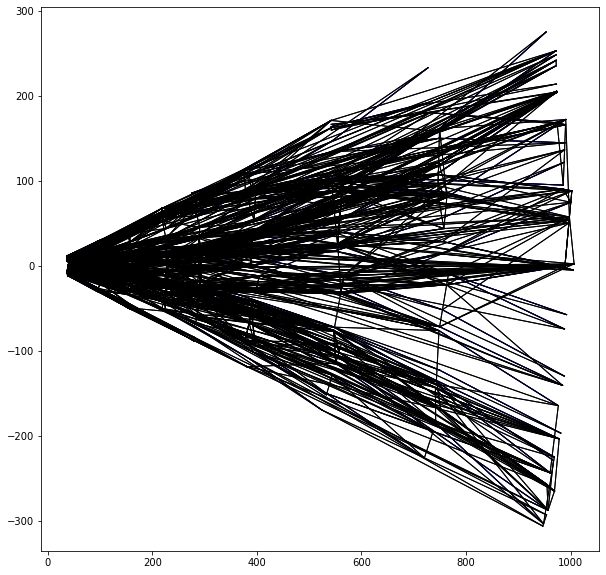

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
axs.plot(x[tps], y[tps], c="b", linewidth=1);
axs.plot(x[es], y[es], c="k", linewidth=1);

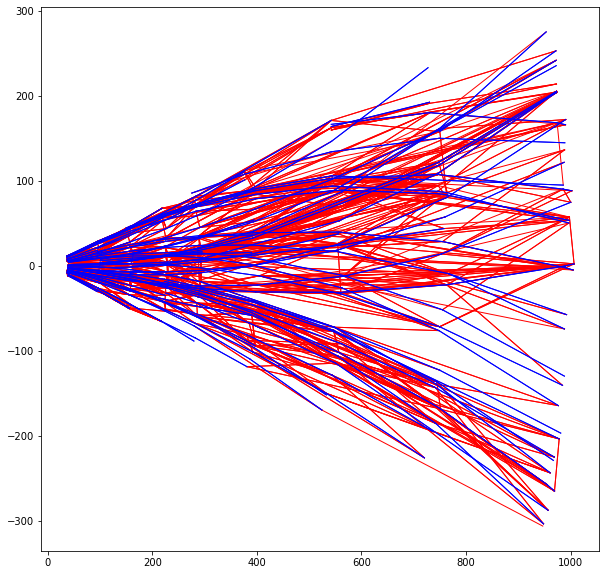

In [66]:
fig, axs = plt.subplots(1, 1, figsize=(10,10))
axs.plot(x[fps], y[fps], c="r", linewidth=1);
axs.plot(x[tps], y[tps], c="b", linewidth=1);